In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-image
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install keras.utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    

In [3]:
!mkdir "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class0_raw.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class1_raw.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class2_raw.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class0_mask.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class1_mask.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class2_mask.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class3_raw.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class3_mask.tif" "/content/salam"


In [4]:
!mkdir '/content/salam/images'
!mkdir '/content/salam/mask'
!mv '/content/salam/class0_raw.tif' '/content/salam/images'
#!mv '/content/salam/class1_raw.tif' '/content/salam/images'
!mv '/content/salam/class2_raw.tif' '/content/salam/images'
!mv '/content/salam/class3_raw.tif' '/content/salam/images'
!mv '/content/salam/class0_mask.tif' '/content/salam/mask'
#!mv '/content/salam/class1_mask.tif' '/content/salam/mask'
!mv '/content/salam/class2_mask.tif' '/content/salam/mask'
!mv '/content/salam/class3_mask.tif' '/content/salam/mask'


In [5]:
!mkdir '/content/salam/images/class0'
#!mkdir '/content/salam/images/class1'
!mkdir '/content/salam/images/class2'
!mkdir '/content/salam/images/class3'
!mkdir '/content/salam/mask/class0'
#!mkdir '/content/salam/mask/class1'
!mkdir '/content/salam/mask/class2'
!mkdir '/content/salam/mask/class3'
!mv '/content/salam/images/class0_raw.tif' '/content/salam/images/class0'
#!mv '/content/salam/images/class1_raw.tif' '/content/salam/images/class1'
!mv '/content/salam/images/class2_raw.tif' '/content/salam/images/class2'
!mv '/content/salam/images/class3_raw.tif' '/content/salam/images/class3'
!mv '/content/salam/mask/class0_mask.tif' '/content/salam/mask/class0'
#!mv '/content/salam/mask/class1_mask.tif' '/content/salam/mask/class1'
!mv '/content/salam/mask/class2_mask.tif' '/content/salam/mask/class2'
!mv '/content/salam/mask/class3_mask.tif' '/content/salam/mask/class3'



In [6]:
import tifffile
import glob
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.optimizers import SGD, RMSprop
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import os
import numpy as np
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import cv2
import time
import pandas as pd
from tqdm import tqdm
import gc; gc.collect()
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as D
import torch.nn.functional as F
from PIL import Image
import torchvision
from torchvision import transforms as T
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image
from keras.utils import to_categorical
# Data preprocessing
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
import random
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Convolution2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.layers.normalization import batch_normalization
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import img_to_array
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import multiprocessing as mp
from numpy.random import seed
seed(0)
import tensorflow
tensorflow.random.set_seed(0)


In [7]:
'''
from skimage.measure import label, regionprops
from skimage.transform import rotate, warp, AffineTransform
from skimage.util import random_noise
import random
from sklearn.decomposition import PCA
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize

# Define the classes you want to include
classes = ['class0', 'class2', 'class3']
num_augmentations_per_image = 5

y_labels = []
num_data_points_per_class = {}

class_index_mapping = {class_name: i for i, class_name in enumerate(classes)}
major_axis_lengths = []
minor_axis_lengths = []
circularity_indices = []
sholl_indices = []
soma_volumes = []  # 3D soma volume
branch_volumes = []  # 3D branch volume
cell_volumes = []  # 3D cell volume
# Remove 'surface_areas' list
all_masks = []
# Load multipage tiff image
def load_multipage_tiff(path):
    return cv2.imread(path, cv2.IMREAD_UNCHANGED)

def preprocess_image(image):
    resized_image = resize(image, (820, 700), anti_aliasing=True)
    normalized_image = resized_image / 255.0
    return normalized_image

def preprocess_mask(mask):
    binary_mask = resize(mask, (820, 700), anti_aliasing=False)
    return binary_mask

def apply_random_augmentation(image, mask):
    random.seed()

    # Random rotation
    angle = random.uniform(-10, 10)
    augmented_image = rotate(image, angle, mode='reflect', preserve_range=True)
    augmented_mask = rotate(mask, angle, mode='reflect', preserve_range=True)

    # Random affine transformation
    aftrans = AffineTransform(rotation=random.uniform(-10, 10), scale=(random.uniform(0.8, 1.2), random.uniform(0.8, 1.2)))
    augmented_image = warp(augmented_image, aftrans.inverse, mode='reflect', preserve_range=True)
    augmented_mask = warp(augmented_mask, aftrans.inverse, mode='reflect', preserve_range=True)

    # Random noise
    augmented_image = random_noise(augmented_image, mode='gaussian', var=0.01)

    # Ensure mask values are binary again
    augmented_mask[augmented_mask > 0] = 1

    return augmented_image, augmented_mask

# Function to calculate 3D volume
def calculate_3d_volume(binary_mask):
    labeled_mask, num_labels = label(binary_mask)
    volumes = []

    for label_idx in range(1, num_labels + 1):
        label_mask = labeled_mask == label_idx
        volume = np.sum(label_mask)
        volumes.append(volume)

    return volumes

# Loop through frames
for class_name in classes:
    class_index = class_index_mapping[class_name]
    images_path = sorted(os.listdir(f'/content/salam/images/{class_name}/'))
    masks_path = sorted(os.listdir(f'/content/salam/mask/{class_name}/'))
    num_data_points = 0

    for image_name, mask_name in zip(images_path, masks_path):
        image = load_multipage_tiff(f'/content/salam/images/{class_name}/{image_name}')
        mask = load_multipage_tiff(f'/content/salam/mask/{class_name}/{mask_name}')

        # Ensure image and mask have the same dimensions
        if image.shape != mask.shape:
            continue
        all_masks.append(mask)
        for frame_idx in range(image.shape[0]):
            frame_image = image[frame_idx]
            frame_mask = mask[frame_idx]

            if frame_mask is None:
                continue

            # Preprocess frame image and mask
            preprocessed_image = preprocess_image(frame_image)
            preprocessed_mask = preprocess_mask(frame_mask)

            labeled_mask = label(preprocessed_mask)
            if labeled_mask is None:
                continue

            props = regionprops(labeled_mask)
            for prop in props:
                major_axis_length = prop.major_axis_length
                minor_axis_length = np.max(prop.minor_axis_length)
                perimeter = prop.perimeter
                area = prop.area
                if perimeter != 0:
                    circularity_index = (4 * np.pi * area) / (perimeter ** 2)
                    sholl_index = perimeter / np.sqrt(area)
                else:
                    circularity_index = 0.0
                    sholl_index = 0.0

                major_axis_lengths.append(major_axis_length)
                minor_axis_lengths.append(minor_axis_length)
                circularity_indices.append(circularity_index)
                sholl_indices.append(sholl_index)

                y_labels.append(class_index)

                # Calculate 3D volume of soma and branches
                soma_volume, branch_volume = 0, 0
                if 'bbox' in prop:
                    bb = prop.bbox
                    soma_mask = preprocessed_mask[bb[0]:bb[2], bb[1]:bb[3]]
                    soma_volume = np.sum(soma_mask)
                    branch_volume = area - soma_volume

                soma_volumes.append(soma_volume)
                branch_volumes.append(branch_volume)

                # Calculate cell volume
                cell_volume = np.sum(preprocessed_mask)
                cell_volumes.append(cell_volume)

                # Remove surface area calculation

                # Apply data augmentation
                for _ in range(num_augmentations_per_image):
                    augmented_image, augmented_mask = apply_random_augmentation(preprocessed_image, preprocessed_mask)
                    augmented_labeled_mask = label(augmented_mask)
                    augmented_props = regionprops(augmented_labeled_mask)

                    for prop_aug in augmented_props:
                        major_axis_length_aug = prop_aug.major_axis_length
                        minor_axis_length_aug = np.max(prop_aug.minor_axis_length)
                        perimeter_aug = prop_aug.perimeter
                        area_aug = prop_aug.area
                        if perimeter_aug != 0:
                            circularity_index_aug = (4 * np.pi * area_aug) / (perimeter_aug ** 2)
                            sholl_index_aug = perimeter_aug / np.sqrt(area_aug)
                        else:
                            circularity_index_aug = 0.0
                            sholl_index_aug = 0.0

                        major_axis_lengths.append(major_axis_length_aug)
                        minor_axis_lengths.append(minor_axis_length_aug)
                        circularity_indices.append(circularity_index_aug)
                        sholl_indices.append(sholl_index_aug)

                        y_labels.append(class_index)

                        # Calculate 3D volume of soma and branches for augmented data
                        soma_volume_aug, branch_volume_aug = 0, 0
                        if 'bbox' in prop_aug:
                            bb_aug = prop_aug.bbox
                            soma_mask_aug = augmented_mask[bb_aug[0]:bb_aug[2], bb_aug[1]:bb_aug[3]]
                            soma_volume_aug = np.sum(soma_mask_aug)
                            branch_volume_aug = area_aug - soma_volume_aug

                        soma_volumes.append(soma_volume_aug)
                        branch_volumes.append(branch_volume_aug)

                        # Calculate cell volume for augmented data
                        cell_volume_aug = np.sum(augmented_mask)
                        cell_volumes.append(cell_volume_aug)

                        # Remove surface area calculation

            num_data_points += len(props) + (num_augmentations_per_image * len(props))

    num_data_points_per_class[class_name] = num_data_points

    print(f"Number of data points in {class_name}: {num_data_points}")

    class_data = {
        'major_axis_length': major_axis_lengths,
        'minor_axis_length': minor_axis_lengths,
        'circularity_index': circularity_indices,
        'sholl_index': sholl_indices,
        'soma_volume': soma_volumes,
        'branch_volume': branch_volumes,
        'cell_volume': cell_volumes,
        'y_labels': y_labels
    }
    class_df = pd.DataFrame(class_data)
    class_df['class_name'] = class_name
    sns.pairplot(class_df)
    plt.title(f"Pairplot for {class_name}")
    plt.show()

# Create the final DataFrame using the updated lists
raw_data = {
    'major_axis_length': major_axis_lengths,
    'minor_axis_length': minor_axis_lengths,
    'circularity_index': circularity_indices,
    'sholl_index': sholl_indices,
    'soma_volume': soma_volumes,
    'branch_volume': branch_volumes,
    'cell_volume': cell_volumes,

    'y_labels': y_labels
}

df = pd.DataFrame(raw_data)

y = df[['y_labels']]
X = df.drop(['y_labels'], axis=1)

n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df = pd.concat([pca_df, y], axis=1)

class_name_mapping = {v: k for k, v in class_index_mapping.items()}
pca_df['class_names'] = pca_df['y_labels'].map(class_name_mapping)

sns.pairplot(pca_df, hue='class_names')
plt.show()

plt.figure(figsize=(16, 5))
sns.heatmap(pca_df.corr(), annot=True)
plt.show()
'''


Output hidden; open in https://colab.research.google.com to view.

In [7]:
from skimage.measure import label, regionprops
from skimage.transform import rotate, warp, AffineTransform
from skimage.util import random_noise
import random
from sklearn.decomposition import PCA
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize

# Define the classes you want to include
classes = ['class0', 'class2', 'class3']
# Define the number of augmentations for each class
num_augmentations_per_image = {
    'class0': 1,
    'class2': 10,  # Increase the number of augmentations for class 2
    'class3': 10   # Increase the number of augmentations for class 3
}

y_labels = []
num_data_points_per_class = {}

class_index_mapping = {class_name: i for i, class_name in enumerate(classes)}
major_axis_lengths = []
minor_axis_lengths = []
circularity_indices = []
sholl_indices = []
soma_volumes = []  # 3D soma volume
branch_volumes = []  # 3D branch volume
cell_volumes = []  # 3D cell volume
# Remove 'surface_areas' list
all_masks = []
# Load multipage tiff image
def load_multipage_tiff(path):
    return cv2.imread(path, cv2.IMREAD_UNCHANGED)

def preprocess_image(image):
    resized_image = resize(image, (820, 700), anti_aliasing=True)
    normalized_image = resized_image / 255.0
    return normalized_image

def preprocess_mask(mask):
    binary_mask = resize(mask, (820, 700), anti_aliasing=False)
    return binary_mask

def apply_random_augmentation(image, mask):
    random.seed()

    # Random rotation
    angle = random.uniform(-10, 10)
    augmented_image = rotate(image, angle, mode='reflect', preserve_range=True)
    augmented_mask = rotate(mask, angle, mode='reflect', preserve_range=True)

    # Random affine transformation
    aftrans = AffineTransform(rotation=random.uniform(-10, 10), scale=(random.uniform(0.8, 1.2), random.uniform(0.8, 1.2)))
    augmented_image = warp(augmented_image, aftrans.inverse, mode='reflect', preserve_range=True)
    augmented_mask = warp(augmented_mask, aftrans.inverse, mode='reflect', preserve_range=True)

    # Random noise
    augmented_image = random_noise(augmented_image, mode='gaussian', var=0.01)

    # Ensure mask values are binary again
    augmented_mask[augmented_mask > 0] = 1

    return augmented_image, augmented_mask

# Function to calculate 3D volume
def calculate_3d_volume(binary_mask):
    labeled_mask, num_labels = label(binary_mask)
    volumes = []

    for label_idx in range(1, num_labels + 1):
        label_mask = labeled_mask == label_idx
        volume = np.sum(label_mask)
        volumes.append(volume)

    return volumes

# Loop through frames
for class_name in classes:
    class_index = class_index_mapping[class_name]
    images_path = sorted(os.listdir(f'/content/salam/images/{class_name}/'))
    masks_path = sorted(os.listdir(f'/content/salam/mask/{class_name}/'))
    num_data_points = 0

    for image_name, mask_name in zip(images_path, masks_path):
        image = load_multipage_tiff(f'/content/salam/images/{class_name}/{image_name}')
        mask = load_multipage_tiff(f'/content/salam/mask/{class_name}/{mask_name}')

        # Ensure image and mask have the same dimensions
        if image.shape != mask.shape:
            continue
        all_masks.append(mask)
        for frame_idx in range(image.shape[0]):
            frame_image = image[frame_idx]
            frame_mask = mask[frame_idx]

            if frame_mask is None:
                continue

            # Preprocess frame image and mask
            preprocessed_image = preprocess_image(frame_image)
            preprocessed_mask = preprocess_mask(frame_mask)

            labeled_mask = label(preprocessed_mask)
            if labeled_mask is None:
                continue

            props = regionprops(labeled_mask)
            for prop in props:
                major_axis_length = prop.major_axis_length
                minor_axis_length = np.max(prop.minor_axis_length)
                perimeter = prop.perimeter
                area = prop.area
                if perimeter != 0:
                    circularity_index = (4 * np.pi * area) / (perimeter ** 2)
                    sholl_index = perimeter / np.sqrt(area)
                else:
                    circularity_index = 0.0
                    sholl_index = 0.0

                major_axis_lengths.append(major_axis_length)
                minor_axis_lengths.append(minor_axis_length)
                circularity_indices.append(circularity_index)
                sholl_indices.append(sholl_index)

                y_labels.append(class_index)

                # Calculate 3D volume of soma and branches
                soma_volume, branch_volume = 0, 0
                if 'bbox' in prop:
                    bb = prop.bbox
                    soma_mask = preprocessed_mask[bb[0]:bb[2], bb[1]:bb[3]]
                    soma_volume = np.sum(soma_mask)
                    branch_volume = area - soma_volume

                soma_volumes.append(soma_volume)
                branch_volumes.append(branch_volume)

                # Calculate cell volume
                cell_volume = np.sum(preprocessed_mask)
                cell_volumes.append(cell_volume)

                # Remove surface area calculation

                # Apply data augmentation
                augmentations = num_augmentations_per_image[class_name]
                for _ in range(augmentations):
                    augmented_image, augmented_mask = apply_random_augmentation(preprocessed_image, preprocessed_mask)
                    augmented_labeled_mask = label(augmented_mask)
                    augmented_props = regionprops(augmented_labeled_mask)

                    for prop_aug in augmented_props:
                        major_axis_length_aug = prop_aug.major_axis_length
                        minor_axis_length_aug = np.max(prop_aug.minor_axis_length)
                        perimeter_aug = prop_aug.perimeter
                        area_aug = prop_aug.area
                        if perimeter_aug != 0:
                            circularity_index_aug = (4 * np.pi * area_aug) / (perimeter_aug ** 2)
                            sholl_index_aug = perimeter_aug / np.sqrt(area_aug)
                        else:
                            circularity_index_aug = 0.0
                            sholl_index_aug = 0.0

                        major_axis_lengths.append(major_axis_length_aug)
                        minor_axis_lengths.append(minor_axis_length_aug)
                        circularity_indices.append(circularity_index_aug)
                        sholl_indices.append(sholl_index_aug)

                        y_labels.append(class_index)

                        # Calculate 3D volume of soma and branches for augmented data
                        soma_volume_aug, branch_volume_aug = 0, 0
                        if 'bbox' in prop_aug:
                            bb_aug = prop_aug.bbox
                            soma_mask_aug = augmented_mask[bb_aug[0]:bb_aug[2], bb_aug[1]:bb_aug[3]]
                            soma_volume_aug = np.sum(soma_mask_aug)
                            branch_volume_aug = area_aug - soma_volume_aug

                        soma_volumes.append(soma_volume_aug)
                        branch_volumes.append(branch_volume_aug)

                        # Calculate cell volume for augmented data
                        cell_volume_aug = np.sum(augmented_mask)
                        cell_volumes.append(cell_volume_aug)

                    num_data_points += len(augmented_props)

    num_data_points_per_class[class_name] = num_data_points

    print(f"Number of data points in {class_name}: {num_data_points}")

    class_data = {
        'major_axis_length': major_axis_lengths,
        'minor_axis_length': minor_axis_lengths,
        'circularity_index': circularity_indices,
        'sholl_index': sholl_indices,
        'soma_volume': soma_volumes,
        'branch_volume': branch_volumes,
        'cell_volume': cell_volumes,
        'y_labels': y_labels
    }
    class_df = pd.DataFrame(class_data)
    class_df['class_name'] = class_name
    sns.pairplot(class_df)
    plt.title(f"Pairplot for {class_name}")
    plt.show()

# Create the final DataFrame using the updated lists
raw_data = {
    'major_axis_length': major_axis_lengths,
    'minor_axis_length': minor_axis_lengths,
    'circularity_index': circularity_indices,
    'sholl_index': sholl_indices,
    'soma_volume': soma_volumes,
    'branch_volume': branch_volumes,
    'cell_volume': cell_volumes,

    'y_labels': y_labels
}

df = pd.DataFrame(raw_data)

y = df[['y_labels']]
X = df.drop(['y_labels'], axis=1)

n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df = pd.concat([pca_df, y], axis=1)

class_name_mapping = {v: k for k, v in class_index_mapping.items()}
pca_df['class_names'] = pca_df['y_labels'].map(class_name_mapping)

sns.pairplot(pca_df, hue='class_names')
plt.show()

plt.figure(figsize=(16, 5))
sns.heatmap(pca_df.corr(), annot=True)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

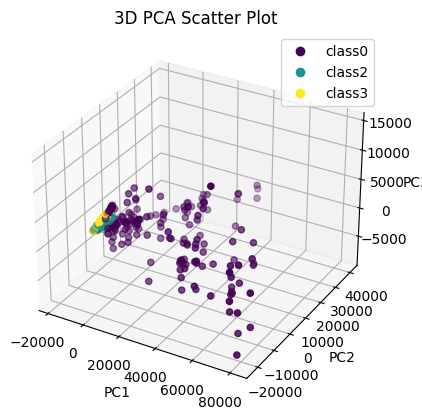

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming you have a DataFrame called pca_df with 3D PCA components
x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['PC3']
classes = pca_df['class_names']

# Create a scatter plot
scatter = ax.scatter(x, y, z, c=classes.map(class_index_mapping))

# Customize the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=class_index_mapping.keys())
plt.show()


In [9]:
import tifffile as tiff

# Initialize a TIFF file for writing
tiff_file = tiff.TiffWriter('3d_features_cl0_2_3.tiff', bigtiff=True)

# Loop through different views or rotations
for angle in range(0, 360, 10):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(cell_volumes, branch_volumes, soma_volumes, c=y_labels, cmap='viridis')
    ax.set_xlabel('Cell Volume')
    ax.set_ylabel('Branch Volume')
    ax.set_zlabel('Soma Volume')
    ax.set_title('3D Scatter Plot of Volumes')

    # Rotate the view
    ax.view_init(elev=20, azim=angle)

    # Save the figure as a temporary image (e.g., PNG)
    temp_image_path = 'temp_image.png'
    fig.savefig(temp_image_path, dpi=300)  # You can adjust the DPI as needed

    # Read the image and append it as a page in the TIFF file
    image_data = plt.imread(temp_image_path)
    tiff_file.save(image_data)

    # Close the figure and remove the temporary image
    plt.close(fig)
    os.remove(temp_image_path)

# Close the TIFF file when done
tiff_file.close()


<ipython-input-9-daf7b6d9bf52>:26: DeprecationWarning: <tifffile.TiffWriter.save> is deprecated. Use TiffWriter.write
  tiff_file.save(image_data)


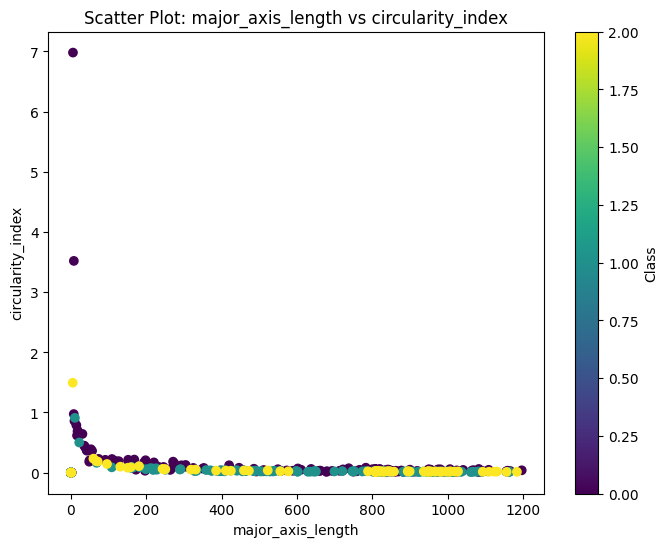

In [10]:
import matplotlib.pyplot as plt

# Select two features to visualize
feature1 = 'major_axis_length'
feature2 = 'circularity_index'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], c=df['y_labels'], cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot: {feature1} vs {feature2}')
plt.show()


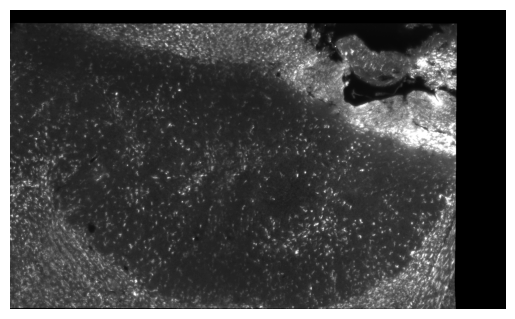

In [11]:
# Iterate through cells and annotate them with feature values
props_list = regionprops(labeled_mask)  # Move this line outside the loop to compute properties only once

for i in range(len(y_labels)):
    class_name = classes[y_labels[i]]

    if i < len(props_list):
        # Access the properties of the current cell (region)
        props = props_list[i]

        # Calculate the cell's position (e.g., using centroid or bounding box)
        centroid = props.centroid  # Calculate the centroid of the current cell
        x_coord, y_coord = centroid  # Use centroid as x and y coordinates

        feature_values = {
            'Major Axis Length': major_axis_lengths[i],
            'Minor Axis Length': minor_axis_lengths[i],
            'Circularity Index': circularity_indices[i],
            'Sholl Index': sholl_indices[i],
            'Soma Volume': soma_volumes[i],
            'Branch Volume': branch_volumes[i],
            'Cell Volume': cell_volumes[i]
        }

        # Create a rectangle or text annotation on the image
        rect = patches.Rectangle((x_coord, y_coord), width, height, linewidth=1, edgecolor='r', facecolor='none')
        text = "\n".join([f"{key}: {value:.2f}" for key, value in feature_values.items()])
        plt.annotate(text, (x_coord, y_coord), color='white', fontsize=6, ha='left', va='bottom')

# Display the annotated multi-stack TIFF image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



In [12]:
import random
import matplotlib.pyplot as plt

# Select the class you want to visualize
class_to_visualize = 'class0'  # Replace with the class you want to visualize

# Filter the data for the selected class
class_data = class_df[class_df['class_name'] == class_to_visualize]

# Determine the number of cells available in the selected class
num_cells_available = len(class_data)

# Select a random sample of cells to visualize (limiting it to the available cells)
num_cells_to_visualize = min(5, num_cells_available)  # Change 5 to your desired number
random_cells = random.sample(range(num_cells_available), num_cells_to_visualize)

# Create subplots to display images and features
plt.figure(figsize=(15, 5 * num_cells_to_visualize))

for i, cell_index in enumerate(random_cells):
    plt.subplot(num_cells_to_visualize, 3, i * 3 + 1)
    plt.imshow(your_image_data[cell_index], cmap='gray')  # Replace with your actual image data
    plt.title(f'Cell {cell_index} Image')
    plt.axis('off')

    plt.subplot(num_cells_to_visualize, 3, i * 3 + 2)
    plt.imshow(class_data.iloc[cell_index]['soma_mask'], cmap='gray')  # Replace with your soma mask data
    plt.title(f'Cell {cell_index} Soma Mask')
    plt.axis('off')

    plt.subplot(num_cells_to_visualize, 3, i * 3 + 3)
    plt.bar(['Major Axis', 'Minor Axis', 'Circularity', 'Sholl Index'],
            class_data.iloc[cell_index][['major_axis_length', 'minor_axis_length', 'circularity_index', 'sholl_index']])
    plt.title(f'Cell {cell_index} Features')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


<Figure size 1500x0 with 0 Axes>

In [13]:
# Iterate through the rows of the DataFrame
for index, row in class_df.iterrows():
    major_axis_length = row['major_axis_length']
    minor_axis_length = row['minor_axis_length']
    circularity_index = row['circularity_index']
    sholl_index = row['sholl_index']

    # Create a figure and axis for the cell image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    # Display major axis length, minor axis length, circularity index, and Sholl index as text
    plt.text(10, 10, f"Major Axis Length: {major_axis_length:.2f}", color='red', fontsize=12)
    plt.text(10, 40, f"Minor Axis Length: {minor_axis_length:.2f}", color='red', fontsize=12)
    plt.text(10, 70, f"Circularity: {circularity_index:.2f}", color='red', fontsize=12)
    plt.text(10, 90, f"Sholl Index: {sholl_index:.2f}", color='red', fontsize=12)

    plt.title(f"Cell with Features (Class: {row['class_name']})")
    plt.axis('off')

    # Save or display the visualization
    # You can save it to a file or display it using plt.show()
    # plt.savefig(f'cell_with_features_{index}.png')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [14]:
import random

# Display at least five cells from each class
num_cells_to_display = 5

for class_name in classes:
    # Get a subset of the DataFrame for the current class
    class_subset = class_df[class_df['class_name'] == class_name]

    # Check if there are enough samples in the class subset
    if len(class_subset) >= num_cells_to_display:
        # Select at least five random cells from the class
        selected_cells = class_subset.sample(n=num_cells_to_display, random_state=42)

        # Display the selected cells and their feature values
        for index, row in selected_cells.iterrows():
            print(f"Class: {class_name}, Cell Index: {index}")
            print(f"Major Axis Length: {row['major_axis_length']}")
            print(f"Minor Axis Length: {row['minor_axis_length']}")
            print(f"Circularity Index: {row['circularity_index']}")
            print(f"Sholl Index: {row['sholl_index']}")
            print(f"Soma Volume: {row['soma_volume']}")
            print(f"Branch Volume: {row['branch_volume']}")
            print(f"Cell Volume: {row['cell_volume']}")
            print("-------------")
    else:
        print(f"Not enough samples in class {class_name} to display {num_cells_to_display}.")

# You can do the same for the PCA DataFrame
for class_name in classes:
    class_subset = pca_df[pca_df['class_names'] == class_name]
    if len(class_subset) >= num_cells_to_display:
        selected_cells = class_subset.sample(n=num_cells_to_display, random_state=42)
        for index, row in selected_cells.iterrows():
            print(f"Class: {class_name}, Cell Index: {index}")
            print(f"PC1: {row['PC1']}")
            print(f"PC2: {row['PC2']}")
            print(f"PC3: {row['PC3']}")
            print("-------------")
    else:
        print(f"Not enough samples in class {class_name} to display {num_cells_to_display}.")


Streaming output truncated to the last 5000 lines.
Class: class2, Cell Index: 369
PC1: -12796.710906620949
PC2: 36.578768149371356
PC3: -852.9612755469299
-------------
Class: class2, Cell Index: 320
PC1: -10340.897046557686
PC2: -1125.480841095261
PC3: 977.3531691251138
-------------
Class: class2, Cell Index: 342
PC1: -12112.600922325682
PC2: 2188.046603942226
PC3: -1739.8097183937239
-------------
Class: class2, Cell Index: 266
PC1: -11265.045282580502
PC2: -991.9091729625354
PC3: 463.0733735394321
-------------
Class: class2, Cell Index: 305
PC1: -9926.493789178847
PC2: -430.85455546371503
PC3: 783.2892568956505
-------------
Class: class2, Cell Index: 369
PC1: -12796.710906620949
PC2: 36.578768149371356
PC3: -852.9612755469299
-------------
Class: class2, Cell Index: 320
PC1: -10340.897046557686
PC2: -1125.480841095261
PC3: 977.3531691251138
-------------
Class: class2, Cell Index: 342
PC1: -12112.600922325682
PC2: 2188.046603942226
PC3: -1739.8097183937239
-------------
Class: cl

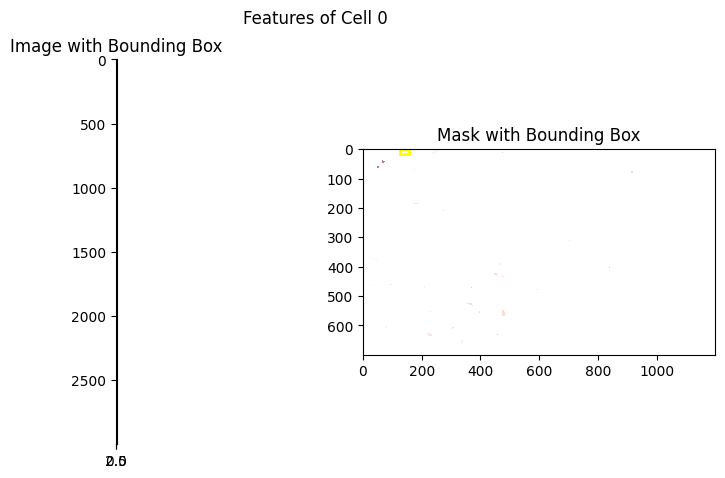

major_axis_length: 808.2895520789564
minor_axis_length: 2.0
circularity_index: 0.008975979010256551
sholl_index: 37.41657386773941


In [15]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_cell_features(cell_index):
    # Get the image and mask for the selected cell
    image = image_data[cell_index]
    mask = all_masks[cell_index]

    # Calculate the features of the cell
    major_axis_length_value = major_axis_lengths[cell_index]
    minor_axis_length_value = minor_axis_lengths[cell_index]
    circularity_indice_value = circularity_indices[cell_index]
    sholl_indice_value = sholl_indices[cell_index]

    # Create a labeled image from the mask
    labeled_image = label(mask)

    # Check if there are any labeled regions in the image
    if labeled_image.max() == 0:
        raise ValueError("No labeled regions found in the mask.")

    # Get the properties of the labeled regions
    props = regionprops(labeled_image)

    # Verify if the cell_index is valid
    if cell_index >= len(props):
        raise ValueError("Invalid cell_index value.")

    # Get the properties of the selected cell
    cell_props = props[cell_index]
    bbox = cell_props.bbox

    # Create a rectangle patch for the bounding box for each subplot
    rect1 = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                             linewidth=2, edgecolor='yellow', facecolor='none')
    rect2 = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                             linewidth=2, edgecolor='yellow', facecolor='none')

    # Display the image and mask with the cell marked by the bounding box
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].add_patch(rect1)  # Add the bounding box to axs[0]
    axs[0].set_title('Image with Bounding Box')

    # Apply the mask to the image to mark the cell
    masked_image = np.ma.masked_where(mask == 0, mask)

    axs[1].imshow(masked_image, cmap='Reds', alpha=0.5)
    axs[1].add_patch(rect2)  # Add the bounding box to axs[1]
    axs[1].set_title('Mask with Bounding Box')

    plt.suptitle('Features of Cell {}'.format(cell_index))
    plt.show()

    # Display the calculated features
    print('major_axis_length:', major_axis_length_value)
    print('minor_axis_length:', minor_axis_length_value)
    print('circularity_index:', circularity_indice_value)
    print('sholl_index:', sholl_indice_value)

# Usage:
cell_index_to_display = 0  # Change this to the desired cell index
display_cell_features(cell_index_to_display)

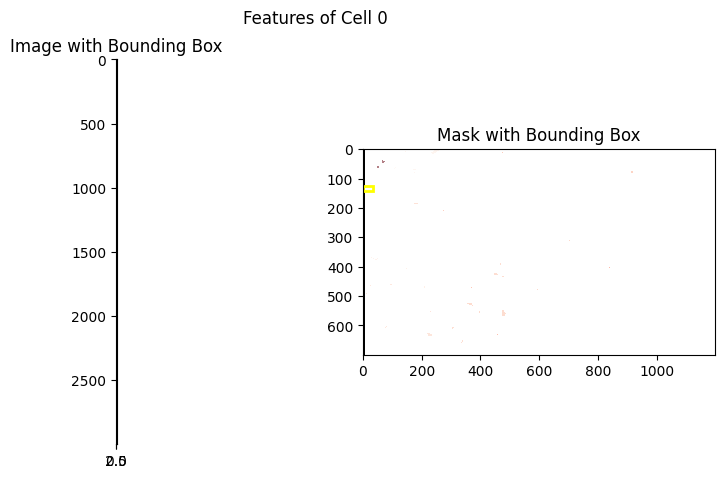

In [16]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_cell_features(cell_index):
    # Get the image and mask for the selected cell
    image = image_data[cell_index]
    mask = all_masks[cell_index]

    # Create a labeled image from the mask
    labeled_image = label(mask)

    # Check if there are any labeled regions in the image
    if labeled_image.max() == 0:
        raise ValueError("No labeled regions found in the mask.")

    # Get the properties of the labeled regions
    props = regionprops(labeled_image)

    # Verify if the cell_index is valid
    if cell_index >= len(props):
        raise ValueError("Invalid cell_index value.")

    # Get the properties of the selected cell
    cell_props = props[cell_index]
    bbox = cell_props.bbox

    # Create a rectangle patch for the bounding box for each subplot
    rect1 = patches.Rectangle((bbox[0], bbox[1]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                             linewidth=2, edgecolor='yellow', facecolor='none')
    rect2 = patches.Rectangle((bbox[0], bbox[1]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                             linewidth=2, edgecolor='yellow', facecolor='none')

    # Display the image and mask with the cell marked by the bounding box
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].add_patch(rect1)  # Add the bounding box to axs[0]
    axs[0].set_title('Image with Bounding Box')

    # Apply the mask to the image to mark the cell
    masked_image = np.ma.masked_where(mask == 0, mask)

    axs[1].imshow(image, cmap='gray')
    axs[1].imshow(masked_image, cmap='Reds', alpha=0.5)
    axs[1].add_patch(rect2)  # Add the bounding box to axs[1]
    axs[1].set_title('Mask with Bounding Box')

    plt.suptitle('Features of Cell {}'.format(cell_index))
    plt.show()

# Usage:
cell_index_to_display = 0  # Change this to the desired cell index
display_cell_features(cell_index_to_display)


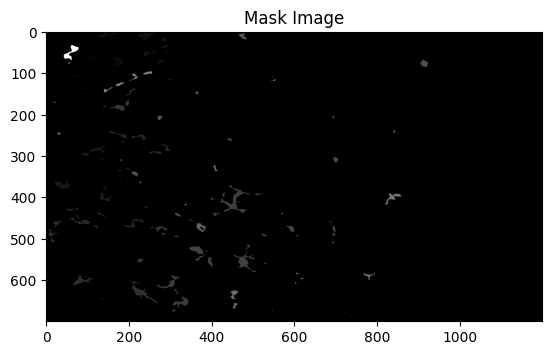

In [17]:
# Display the mask image
plt.imshow(all_masks[0].squeeze(), cmap='gray')
plt.title("Mask Image")
plt.show()

# Skeletonize the mask image
#skeleton = morphology.skeletonize(mask_data[10].squeeze())

# Display the skeletonized image
#plt.imshow(skeleton, cmap='gray')
#plt.title("Skeletonized Image")
#plt.show()

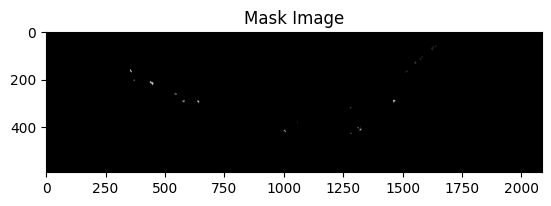

In [18]:
# Display the mask image
plt.imshow(all_masks[1].squeeze(), cmap='gray')
plt.title("Mask Image")
plt.show()

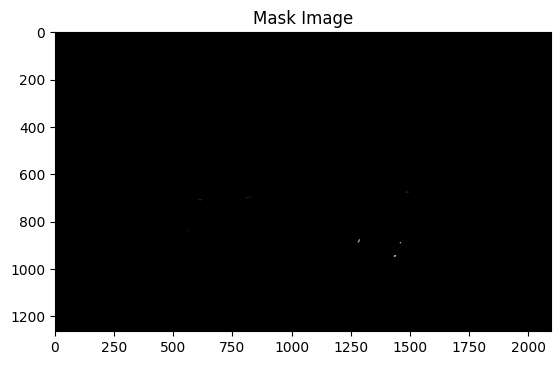

In [19]:
# Display the mask image
plt.imshow(all_masks[2].squeeze(), cmap='gray')
plt.title("Mask Image")
plt.show()

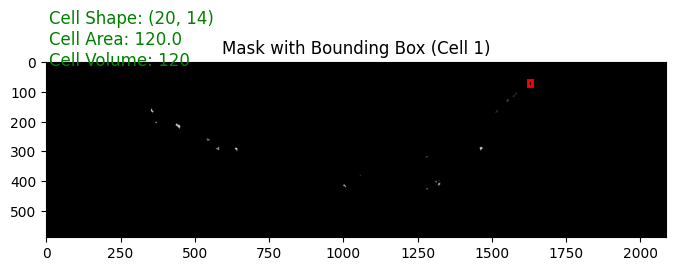

In [20]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose the index of the cell you want to display
cell_index = 1  # Change this to the desired index

# Get the mask for the selected cell
mask = all_masks[cell_index]

# Create a labeled image from the mask
labeled_image = label(mask)

# Check if there are any labeled regions in the image
if labeled_image.max() == 0:
    raise ValueError("No labeled regions found in the mask.")

# Get the properties of the labeled regions
props = regionprops(labeled_image)

# Verify if the cell_index is valid
if cell_index >= len(props):
    raise ValueError("Invalid cell_index value.")

# Get the properties of the selected cell
cell_props = props[cell_index]
bbox = cell_props.bbox

# Create a rectangle patch for the bounding box
rect = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         linewidth=2, edgecolor='red', facecolor='none')

# Display the mask with the cell marked by the bounding box
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mask, cmap='gray')
ax.add_patch(rect)  # Add the bounding box to the mask

# Display the shape, area, and volume of the selected cell
shape = cell_props.image.shape
area = cell_props.area
volume = np.sum(cell_props.image)

# Format the display text
text = f"Cell Shape: {shape}\nCell Area: {area}\nCell Volume: {volume}"

# Add the text to the plot
ax.text(10, 10, text, fontsize=12, color='green')

ax.set_title(f"Mask with Bounding Box (Cell {cell_index})")
plt.show()

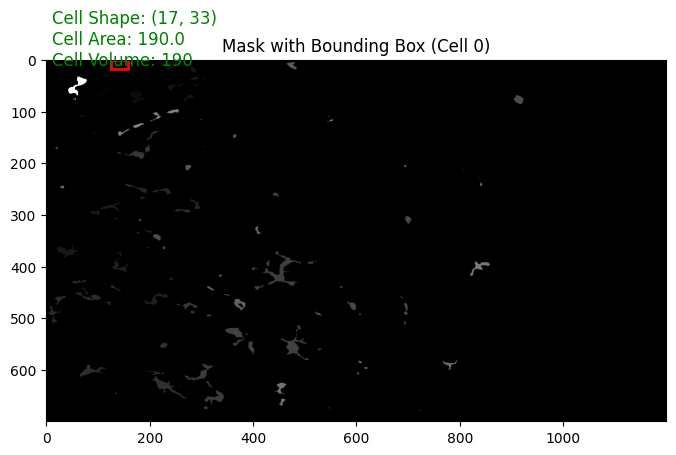

In [21]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose the index of the cell you want to display
cell_index = 0  # Change this to the desired index

# Get the mask for the selected cell
mask = all_masks[cell_index]

# Create a labeled image from the mask
labeled_image = label(mask)

# Check if there are any labeled regions in the image
if labeled_image.max() == 0:
    raise ValueError("No labeled regions found in the mask.")

# Get the properties of the labeled regions
props = regionprops(labeled_image)

# Verify if the cell_index is valid
if cell_index >= len(props):
    raise ValueError("Invalid cell_index value.")

# Get the properties of the selected cell
cell_props = props[cell_index]
bbox = cell_props.bbox

# Create a rectangle patch for the bounding box
rect = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         linewidth=2, edgecolor='red', facecolor='none')

# Display the mask with the cell marked by the bounding box
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mask, cmap='gray')
ax.add_patch(rect)  # Add the bounding box to the mask

# Display the shape, area, and volume of the selected cell
shape = cell_props.image.shape
area = cell_props.area
volume = np.sum(cell_props.image)

# Format the display text
text = f"Cell Shape: {shape}\nCell Area: {area}\nCell Volume: {volume}"

# Add the text to the plot
ax.text(10, 10, text, fontsize=12, color='green')

ax.set_title(f"Mask with Bounding Box (Cell {cell_index})")
plt.show()

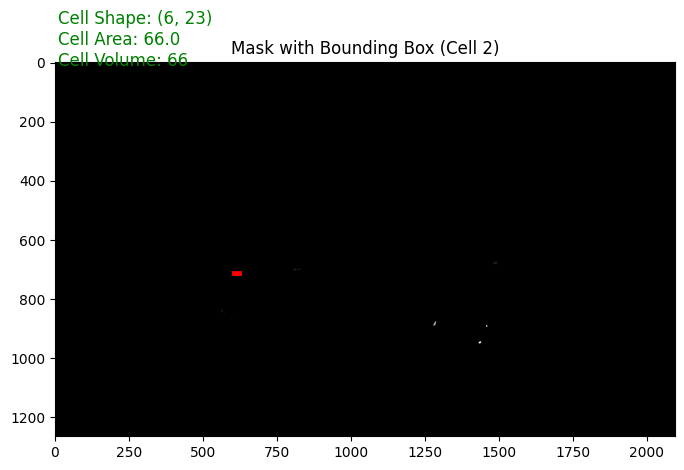

In [22]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose the index of the cell you want to display
cell_index = 2  # Change this to the desired index

# Get the mask for the selected cell
mask = all_masks[cell_index]

# Create a labeled image from the mask
labeled_image = label(mask)

# Check if there are any labeled regions in the image
if labeled_image.max() == 50:
    raise ValueError("No labeled regions found in the mask.")

# Get the properties of the labeled regions
props = regionprops(labeled_image)

# Verify if the cell_index is valid
if cell_index >= len(props):
    raise ValueError("Invalid cell_index value.")

# Get the properties of the selected cell
cell_props = props[cell_index]
bbox = cell_props.bbox

# Create a rectangle patch for the bounding box
rect = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         linewidth=2, edgecolor='red', facecolor='none')

# Display the mask with the cell marked by the bounding box
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mask, cmap='gray')
ax.add_patch(rect)  # Add the bounding box to the mask

# Display the shape, area, and volume of the selected cell
shape = cell_props.image.shape
area = cell_props.area
volume = np.sum(cell_props.image)

# Format the display text
text = f"Cell Shape: {shape}\nCell Area: {area}\nCell Volume: {volume}"

# Add the text to the plot
ax.text(10, 10, text, fontsize=12, color='green')

ax.set_title(f"Mask with Bounding Box (Cell {cell_index})")
plt.show()

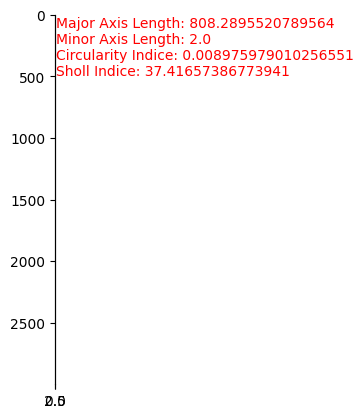

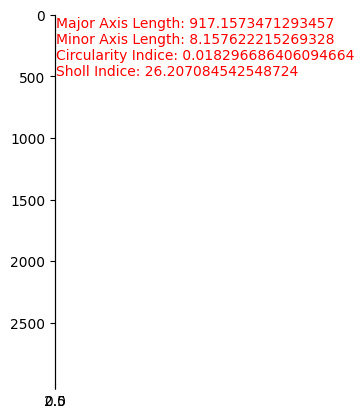

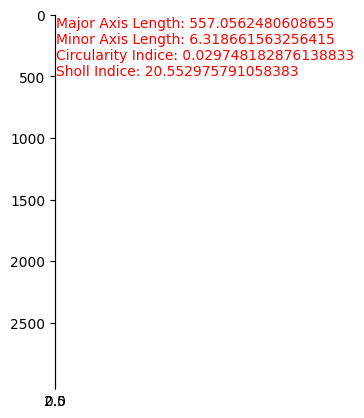

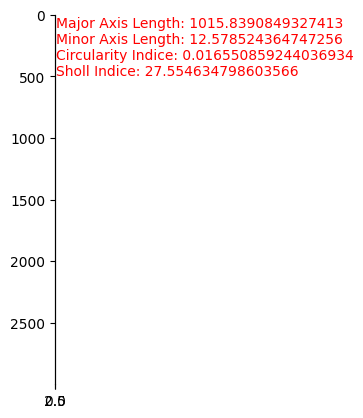

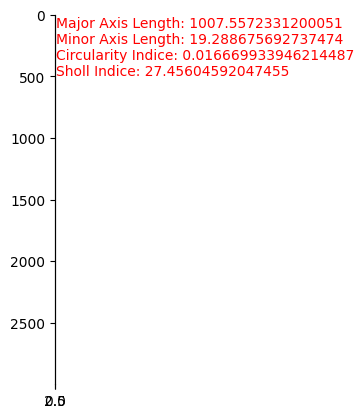

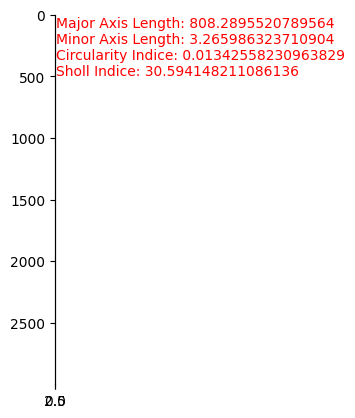

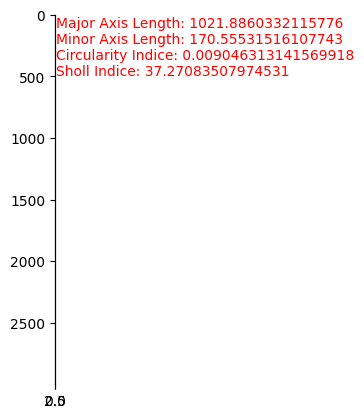

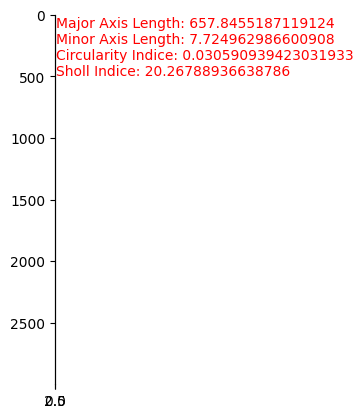

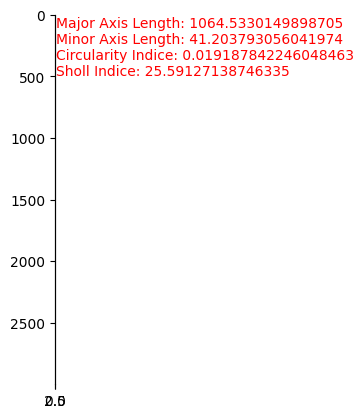

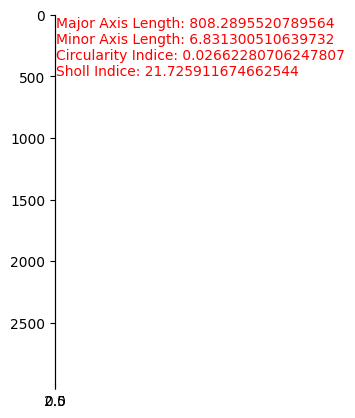

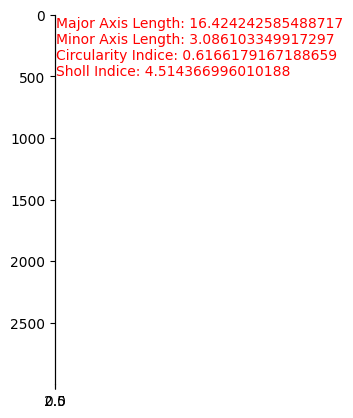

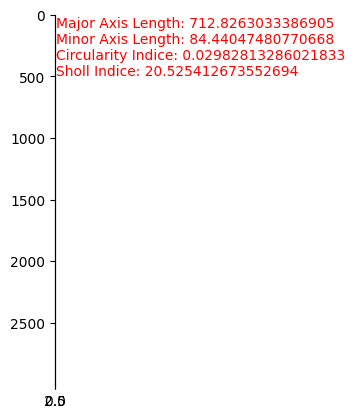

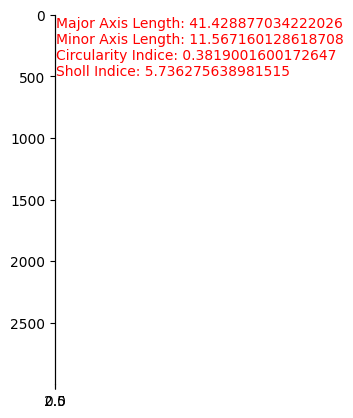

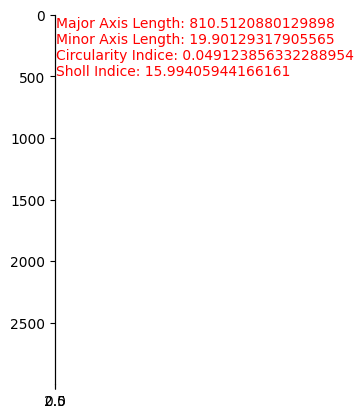

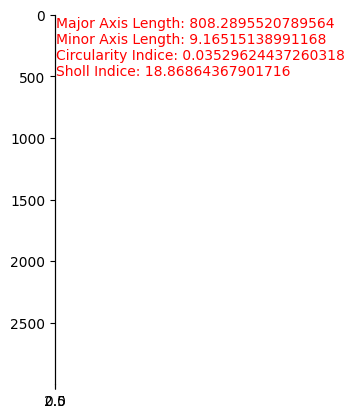

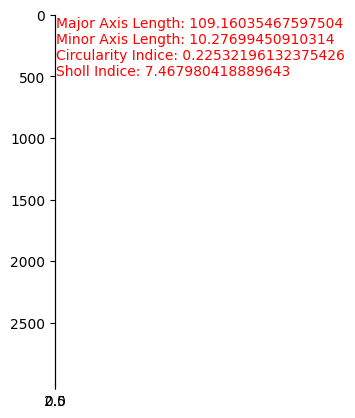

KeyboardInterrupt: ignored

In [23]:
import matplotlib.pyplot as plt

# Display features on images
for i in range(len(image_data)):
    # Plot the image
    plt.imshow(image_data[i].squeeze(), cmap='gray')

    # Add feature text
    text = f"Major Axis Length: {major_axis_lengths[i]}\nMinor Axis Length: {minor_axis_lengths[i]}\nCircularity Indice: {circularity_indices[i]}\nSholl Indice: {sholl_indices[i]}"
    plt.text(10, 10, text, color='red', fontsize=10, verticalalignment='top')

    # Show the plot
    plt.show()

# Display features on masks
for i in range(len(mask_data)):
    # Plot the mask
    plt.imshow(mask_data[i].squeeze(), cmap='gray')

    # Add feature text
    text = f"Major Axis Length: {major_axis_lengths[i]}\nMinor Axis Length: {minor_axis_lengths[i]}\nCircularity Indice: {circularity_indices[i]}\nSholl Indice: {sholl_indices[i]}"
    plt.text(10, 10, text, color='red', fontsize=10, verticalalignment='top')

    # Show the plot
    plt.show()


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df.loc[:, 'PC1':'PC3'], np.ravel(pca_df[['y_labels']]),
                                                   test_size=0.4, random_state=42, stratify=np.ravel(pca_df[['y_labels']]))

# Convert X_train and y_train to NumPy arrays if they are not already
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape y_train to be a 1D array if needed
y_train = y_train.ravel()

# Create an instance of SVC
svc = SVC(probability=True, class_weight='balanced')

'''
# Define the parameter grid for GridSearchCV
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],  # Add more values
    'gamma': [0.1, 1, 10],  # Add more values
}

# Create GridSearchCV object
clf = GridSearchCV(svc, parameters, cv=4)

'''
# Define the parameter grid for GridSearchCV
#parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10]}
# Create GridSearchCV object
clf = GridSearchCV(svc, parameters, cv=4)
#clf = RandomizedSearchCV(svc, parameters, n_iter=10, cv=4)
# Fit the classifier to the training data

clf.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert X_test and y_test to NumPy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate classification error
classification_error = 1 - accuracy
print("Classification Error:", classification_error)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=range(len(classes)))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, false positive rate, and precision for each class
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    false_positive_rate = false_positives / (false_positives + true_negatives)
    precision = true_positives / (true_positives + false_positives)

    print("Class", i+1)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    print()


Accuracy: 0.8087431693989071
Classification Error: 0.1912568306010929
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.90        85
           1       0.83      0.74      0.78        65
           2       0.55      0.88      0.67        33

    accuracy                           0.81       183
   macro avg       0.79      0.82      0.79       183
weighted avg       0.85      0.81      0.82       183

Confusion Matrix:
[[71  6  8 ...  0  0  0]
 [ 1 48 16 ...  0  0  0]
 [ 0  4 29 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Class 1
Sensitivity: 0.8352941176470589
Specificity: 0.9897959183673469
False Positive Rate: 0.01020408163265306
Precision: 0.9861111111111112

Class 2
Sensitivity: 0.7384615384615385
Specificity: 0.9152542372881356
False Positive Rate: 0.0847457627118644
Precision: 0.8275862068965517

Class 3
Sensitivity: 0.8787878787878788
Specificity: 0.84
False P

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert X_test and y_test to NumPy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate classification error
classification_error = 1 - accuracy
print("Classification Error:", classification_error)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, false positive rate, and precision for each class
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    false_positive_rate = false_positives / (false_positives + true_negatives)
    precision = true_positives / (true_positives + false_positives)

    print("Class", i)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    print()


Accuracy: 0.8087431693989071
Classification Error: 0.1912568306010929
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.90        85
           1       0.83      0.74      0.78        65
           2       0.55      0.88      0.67        33

    accuracy                           0.81       183
   macro avg       0.79      0.82      0.79       183
weighted avg       0.85      0.81      0.82       183

Confusion Matrix:
[[71  6  8]
 [ 1 48 16]
 [ 0  4 29]]
Class 0
Sensitivity: 0.8352941176470589
Specificity: 0.9897959183673469
False Positive Rate: 0.01020408163265306
Precision: 0.9861111111111112

Class 1
Sensitivity: 0.7384615384615385
Specificity: 0.9152542372881356
False Positive Rate: 0.0847457627118644
Precision: 0.8275862068965517

Class 2
Sensitivity: 0.8787878787878788
Specificity: 0.84
False Positive Rate: 0.16
Precision: 0.5471698113207547



In [27]:
!pip install scikit-plot

<Axes: title={'center': 'ROC Curves of HGG and LGG Using SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

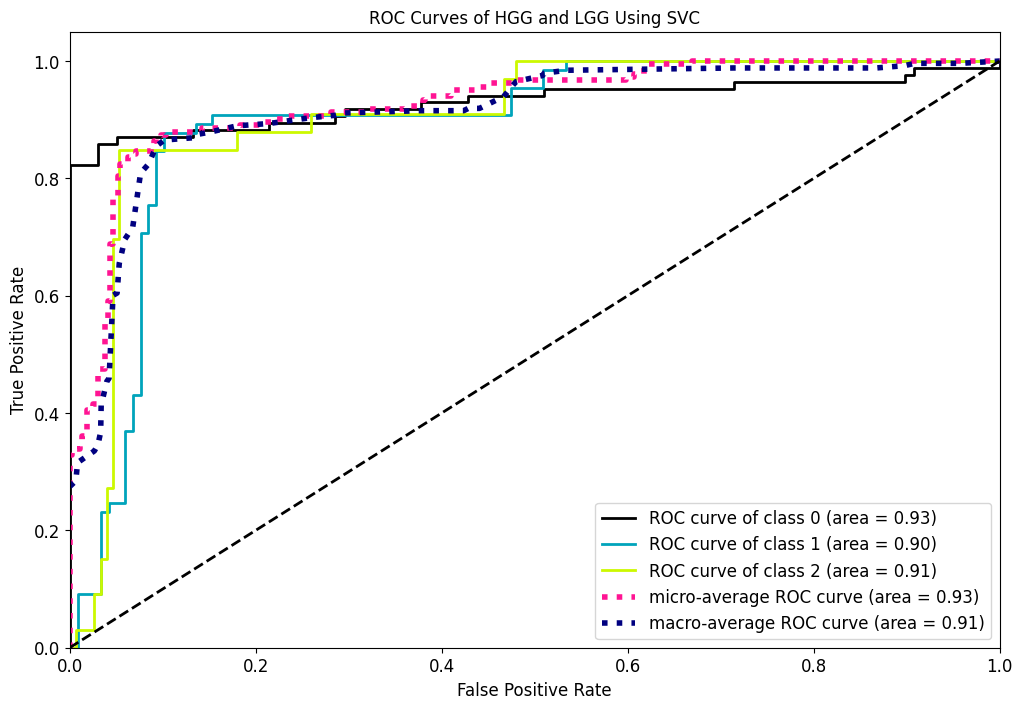

In [28]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test),
                       title="ROC Curves of HGG and LGG Using SVC", figsize = (12, 8), text_fontsize = 'large')

In [29]:
!pip install joblib

In [30]:
#from sklearn.externals import joblib
from joblib import dump
# Save the trained model
dump(clf, "svm_model.pkl")


['svm_model.pkl']

In [31]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from joblib import load

In [32]:
clf = load("/content/svm_model.pkl")  # Load your trained model

In [33]:
from joblib import load

clf = load("svm_model.pkl")

In [34]:
!pip install matplotlib pillow numpy

In [ ]:
'''
# Preprocess the test image and extract features
test_image = cv2.imread('/content/test_image_1.png', 0)  # Load the test image
test_image = cv2.resize(test_image, dsize=(768, 512), interpolation=cv2.INTER_AREA)  # Resize the image

# Extract features from the test image
test_elongation = calculate_elongation(test_image)
test_flatness = calculate_flatness(test_image)
# Calculate other features as needed

# Create the feature vector for the test image
test_feature_vector = np.array([[test_elongation, test_flatness, test_major_axis_length, test_minor_axis_length, test_max_3D_diameter, test_sphericity, test_circularity_indice, test_sholl_indice, test_volume_cell, test_solidity]])  # Add other features to the array

# Load the trained SVM model
from joblib import load
svm_model = load("svm_model.pkl")

# Make predictions on the test data
predictions = svm_model.predict(test_feature_vector)
'''

In [ ]:
'''

# Load the trained SVM model
from joblib import load
# Preprocess the test image and extract features
test_image = cv2.imread('/content/test_image_1.png', 0)  # Load the test image
test_image = cv2.resize(test_image, dsize=(768, 512), interpolation=cv2.INTER_AREA)  # Resize the image

# Extract features from the test image
test_elongation = calculate_elongation(test_image)
test_flatness = calculate_flatness(test_image)
# Calculate other features as needed

test_major_axis_length = calculate_major_axis_length(test_image)
test_minor_axis_length = calculate_minor_axis_length(test_image)
test_max_3D_diameter = calculate_max_3D_diameter(test_image)
test_sphericity = calculate_sphericity(test_image)
test_circularity_indice = calculate_circularity_indice(test_image)
test_sholl_indice = calculate_sholl_indice(test_image)
test_volume_cell = calculate_volume_cell(test_image)
test_solidity = calculate_solidity(test_image)

# Create the feature vector for the test image
test_feature_vector = np.array([[test_elongation, test_flatness, test_major_axis_length, test_minor_axis_length, test_max_3D_diameter, test_sphericity, test_circularity_indice, test_sholl_indice, test_volume_cell, test_solidity]])  # Add other features to the array

svm_model = load("svm_model.pkl")

# Make predictions on the test data
predictions = svm_model.predict(test_feature_vector)


'''

In [ ]:
'''

# Make predictions on the test data
predictions = svm_model.predict(test_feature_vector)

# Display the predictions
print("Cell Classification Predictions:")
print(predictions)



# Display the test image
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.title('Test Image')
plt.show()

# Display the resulted features and predictions

print("Test Image Features:")
print("Elongation:", test_elongation)
print("Flatness:", test_flatness)
print("Major Axis Length:", test_major_axis_length)
print("Minor Axis Length:", test_minor_axis_length)
print("Max 3D Diameter:", test_max_3D_diameter)
print("Sphericity:", test_sphericity)
print("Circularity Indice:", test_circularity_indice)
print("Sholl Indice:", test_sholl_indice)
print("Volume Cell:", test_volume_cell)
print("Solidity:", test_solidity)

print("Predictions:", predictions)
'''

# **Random Forest Classifier**

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [38]:
best_random = rf_random.best_estimator_
best_random.fit(X_test, y_test)
best_random.score(X_test, y_test)

0.907103825136612

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred_rf = rf_random.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate classification error
classification_error_rf = 1 - accuracy_rf
print("Classification Error:", classification_error_rf)

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Calculate sensitivity, specificity, false positive rate, and precision for each class
num_classes_rf = len(np.unique(y_test))
for i in range(num_classes_rf):
    true_positives_rf = conf_matrix_rf[i, i]
    false_positives_rf = np.sum(conf_matrix_rf[:, i]) - true_positives_rf
    false_negatives_rf = np.sum(conf_matrix_rf[i, :]) - true_positives_rf
    true_negatives_rf = np.sum(conf_matrix_rf) - true_positives_rf - false_positives_rf - false_negatives_rf

    sensitivity_rf = true_positives_rf / (true_positives_rf + false_negatives_rf)
    specificity_rf = true_negatives_rf / (true_negatives_rf + false_positives_rf)
    false_positive_rate_rf = false_positives_rf / (false_positives_rf + true_negatives_rf)
    precision_rf = true_positives_rf / (true_positives_rf + false_positives_rf)

    print("Class", i)
    print("Sensitivity:", sensitivity_rf)
    print("Specificity:", specificity_rf)
    print("False Positive Rate:", false_positive_rate_rf)
    print("Precision:", precision_rf)
    print()


Accuracy: 0.907103825136612
Classification Error: 0.09289617486338797
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        85
           1       0.85      0.92      0.88        65
           2       0.85      0.85      0.85        33

    accuracy                           0.91       183
   macro avg       0.89      0.90      0.89       183
weighted avg       0.91      0.91      0.91       183

Confusion Matrix:
[[78  6  1]
 [ 1 60  4]
 [ 0  5 28]]
Class 0
Sensitivity: 0.9176470588235294
Specificity: 0.9897959183673469
False Positive Rate: 0.01020408163265306
Precision: 0.9873417721518988

Class 1
Sensitivity: 0.9230769230769231
Specificity: 0.9067796610169492
False Positive Rate: 0.09322033898305085
Precision: 0.8450704225352113

Class 2
Sensitivity: 0.8484848484848485
Specificity: 0.9666666666666667
False Positive Rate: 0.03333333333333333
Precision: 0.8484848484848485



In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the labels on your test data
y_pred = best_random.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate class error
class_error = 1 - accuracy
print(f"Class Error: {class_error:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity, specificity, and false positive rate for each class
for class_label in range(num_classes):  # num_classes is the number of classes in your dataset
    true_positives = conf_matrix[class_label, class_label]
    false_positives = conf_matrix[:, class_label].sum() - true_positives
    false_negatives = conf_matrix[class_label, :].sum() - true_positives
    true_negatives = conf_matrix.sum() - (true_positives + false_positives + false_negatives)

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    false_positive_rate = false_positives / (false_positives + true_negatives)

    print(f"Class {class_label} - Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}, False Positive Rate: {false_positive_rate:.2f}")


Accuracy: 0.91
Class Error: 0.09
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        85
           1       0.85      0.92      0.88        65
           2       0.85      0.85      0.85        33

    accuracy                           0.91       183
   macro avg       0.89      0.90      0.89       183
weighted avg       0.91      0.91      0.91       183

Confusion Matrix:
 [[78  6  1]
 [ 1 60  4]
 [ 0  5 28]]
Class 0 - Sensitivity: 0.92, Specificity: 0.99, False Positive Rate: 0.01
Class 1 - Sensitivity: 0.92, Specificity: 0.91, False Positive Rate: 0.09
Class 2 - Sensitivity: 0.85, Specificity: 0.97, False Positive Rate: 0.03


<Axes: title={'center': 'ROC CURVES OF HGG AND LGG USING RANDOM FOREST CLASSIFIER'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

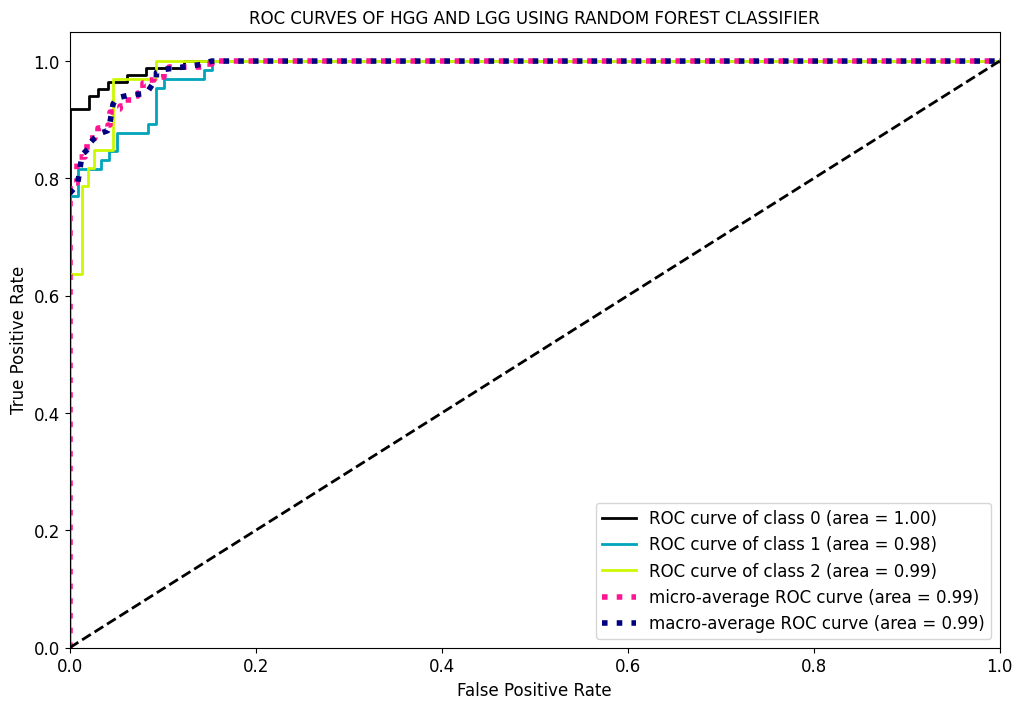

In [41]:
skplt.metrics.plot_roc(y_test, best_random.predict_proba(X_test),
                       title="ROC CURVES OF HGG AND LGG USING RANDOM FOREST CLASSIFIER", figsize = (12, 8), text_fontsize = 'large')

In [42]:
from joblib import dump
#saving the training model
dump(rf_random, "random_forest_model.pkl")

['random_forest_model.pkl']

In [43]:
from joblib import load
rf_model = load("random_forest_model.pkl")

In [ ]:
'''
predictions = rf_model.predict(test_feature_vector)
print("predicted_label:", predictions)
'''

In [ ]:
'''
# Display the prediction
print("Predicted label:", predictions)

# Evaluate the accuracy of each feature
features = ['elongation', 'flatness', 'major_axis_length', 'minor_axis_length', 'max_3D_diameter', 'sphericity', 'circularity_indice', 'sholl_indice', 'volume_cell', 'solidity']
feature_accuracies = {}

for feature in features:
    # Create a copy of the test feature vector with a single feature set to zero
    test_feature_vector_zero = test_feature_vector.copy()
    test_feature_vector_zero[0, features.index(feature)] = 0

    # Make a prediction with the modified feature vector
    zero_prediction = rf_model.predict(test_feature_vector_zero)

    # Calculate the accuracy of the feature
    feature_accuracy = accuracy_score([predictions], [zero_prediction])
    feature_accuracies[feature] = feature_accuracy

# Display the accuracies of each feature
for feature, accuracy in feature_accuracies.items():
    print(f"{feature} accuracy:", accuracy)

# Display the image
cv2.imshow("Test Image", test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

# **Neural Networks**

In [44]:
from keras.optimizers import legacy as optimizer
!pip install --upgrade tensorflow

In [45]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
# Create a TensorFlow Keras Sequential model
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='random_normal', input_shape=(3,)))
model.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))


In [ ]:
'''
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_shape=(3,)))
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))
'''

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X.shape)

(273, 3)
(273,)
(456, 7)


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 16)                176       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               1

In [48]:
from keras.optimizers import Adam
from keras.utils import to_categorical

# Assuming you have 3 classes, make sure to convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)

# Then, compile and train your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, batch_size=8, epochs=3000)


Streaming output truncated to the last 5000 lines.
35/35 [==============================] - 0s 7ms/step - loss: 0.2170 - accuracy: 0.8864
Epoch 502/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.3983 - accuracy: 0.8535
Epoch 503/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.3512 - accuracy: 0.8608
Epoch 504/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.2393 - accuracy: 0.8645
Epoch 505/3000
35/35 [==============================] - 0s 8ms/step - loss: 0.2302 - accuracy: 0.8901
Epoch 506/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.2353 - accuracy: 0.8828
Epoch 507/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.2312 - accuracy: 0.8828
Epoch 508/3000
35/35 [==============================] - 0s 7ms/step - loss: 0.2383 - accuracy: 0.8938
Epoch 509/3000
35/35 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.9084
Epoch 510/3000
35/35 [========================

In [49]:
eval_model=model.evaluate(X_train, y_train_encoded)
eval_model

9/9 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9121


[0.19006028771400452, 0.9120879173278809]

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Make predictions on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1)


6/6 [==============================] - 0s 4ms/step


In [51]:
# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

# Calculate classification error
classification_error_nn = 1 - accuracy_nn
print("Classification Error:", classification_error_nn)


# Generate classification report
class_report_nn = classification_report(y_test, y_pred_nn)
print("Classification Report:")
print(class_report_nn)


# Generate confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix_nn)


num_classes_nn = len(np.unique(y_test))
for i in range(num_classes_nn):
    true_positives_nn = conf_matrix_nn[i, i]
    false_positives_nn = np.sum(conf_matrix_nn[:, i]) - true_positives_nn
    false_negatives_nn = np.sum(conf_matrix_nn[i, :]) - true_positives_nn
    true_negatives_nn = np.sum(conf_matrix_nn) - true_positives_nn - false_positives_nn - false_negatives_nn

    sensitivity_nn = true_positives_nn / (true_positives_nn + false_negatives_nn)
    specificity_nn = true_negatives_nn / (true_negatives_nn + false_positives_nn)
    false_positive_rate_nn = false_positives_nn / (false_positives_nn + true_negatives_nn)
    precision_nn = true_positives_nn / (true_positives_nn + false_positives_nn)

    print("Class", i)
    print("Sensitivity:", sensitivity_nn)
    print("Specificity:", specificity_nn)
    print("False Positive Rate:", false_positive_rate_nn)
    print("Precision:", precision_nn)
    print()


Accuracy: 0.8524590163934426
Classification Error: 0.14754098360655743
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        85
           1       0.76      0.91      0.83        65
           2       0.91      0.61      0.73        33

    accuracy                           0.85       183
   macro avg       0.86      0.81      0.82       183
weighted avg       0.86      0.85      0.85       183

Confusion Matrix:
[[77  7  1]
 [ 5 59  1]
 [ 1 12 20]]
Class 0
Sensitivity: 0.9058823529411765
Specificity: 0.9387755102040817
False Positive Rate: 0.061224489795918366
Precision: 0.927710843373494

Class 1
Sensitivity: 0.9076923076923077
Specificity: 0.8389830508474576
False Positive Rate: 0.16101694915254236
Precision: 0.7564102564102564

Class 2
Sensitivity: 0.6060606060606061
Specificity: 0.9866666666666667
False Positive Rate: 0.013333333333333334
Precision: 0.9090909090909091



In [56]:
print(X_test.shape)

(183, 3)


# **deep network**

In [58]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.callbacks import EarlyStopping


# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)

# Create a TensorFlow Keras Sequential model
model_2 = Sequential()
model_2.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_shape=(3,)))
model_2.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(1024, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
model_2.add(Dropout(0.1))  # Add dropout layer with a dropout rate of 0.5
model_2.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

# Compile the model with a specified learning rate
optimizer = Adam(lr=0.001)  # You can adjust the learning rate as needed
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model_2.fit(X_train, y_train_encoded, batch_size=8, epochs=3000, validation_split=0.2)#, callbacks=[early_stopping])

# Make predictions on the test set
y_pred_nn = model_2.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

# Calculate classification error
classification_error_nn = 1 - accuracy_nn
print("Classification Error:", classification_error_nn)

# Generate classification report
class_report_nn = classification_report(y_test, y_pred_nn)
print("Classification Report:")
print(class_report_nn)

# Generate confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix_nn)


Streaming output truncated to the last 5000 lines.
Epoch 510/3000
28/28 [==============================] - 1s 34ms/step - loss: 0.6232 - accuracy: 0.7294 - val_loss: 0.6005 - val_accuracy: 0.7273
Epoch 511/3000
28/28 [==============================] - 1s 22ms/step - loss: 0.5924 - accuracy: 0.7156 - val_loss: 0.6045 - val_accuracy: 0.7455
Epoch 512/3000
28/28 [==============================] - 1s 23ms/step - loss: 0.6318 - accuracy: 0.7202 - val_loss: 0.6032 - val_accuracy: 0.7273
Epoch 513/3000
28/28 [==============================] - 1s 22ms/step - loss: 0.5965 - accuracy: 0.7385 - val_loss: 0.6268 - val_accuracy: 0.7455
Epoch 514/3000
28/28 [==============================] - 1s 22ms/step - loss: 0.6406 - accuracy: 0.6835 - val_loss: 0.5979 - val_accuracy: 0.7273
Epoch 515/3000
28/28 [==============================] - 1s 22ms/step - loss: 0.6194 - accuracy: 0.7202 - val_loss: 0.5949 - val_accuracy: 0.7636
Epoch 516/3000
28/28 [==============================] - 1s 22ms/step - loss: 0.

# ***deep transfer learning model***

In [69]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)

# Create a TensorFlow Keras Sequential model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_shape=(3,)))
model.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.1))  # Add dropout layer with a dropout rate of 0.5
model.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

# Compile the model with a specified learning rate
optimizer = Adam(learning_rate=0.0001)  # Use learning_rate instead of lr
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_encoded, batch_size=8, epochs=1000, validation_split=0.2)  #, callbacks=[early_stopping])

# Make predictions on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

# Calculate classification error
classification_error_nn = 1 - accuracy_nn
print("Classification Error:", classification_error_nn)

# Generate classification report
class_report_nn = classification_report(y_test, y_pred_nn)
print("Classification Report:")
print(class_report_nn)

# Generate confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix_nn)


Epoch 1/1000
28/28 [==============================] - 6s 50ms/step - loss: 1.0983 - accuracy: 0.4404 - val_loss: 1.0976 - val_accuracy: 0.4364
Epoch 2/1000
28/28 [==============================] - 1s 40ms/step - loss: 1.0953 - accuracy: 0.4679 - val_loss: 1.0855 - val_accuracy: 0.4364
Epoch 3/1000
28/28 [==============================] - 1s 26ms/step - loss: 1.0230 - accuracy: 0.4679 - val_loss: 0.8293 - val_accuracy: 0.4364
Epoch 4/1000
28/28 [==============================] - 1s 25ms/step - loss: 0.8346 - accuracy: 0.4679 - val_loss: 0.7169 - val_accuracy: 0.4364
Epoch 5/1000
28/28 [==============================] - 1s 35ms/step - loss: 0.7549 - accuracy: 0.6055 - val_loss: 0.7198 - val_accuracy: 0.5636
Epoch 6/1000
28/28 [==============================] - 1s 35ms/step - loss: 0.7202 - accuracy: 0.6972 - val_loss: 0.7083 - val_accuracy: 0.7636
Epoch 7/1000
28/28 [==============================] - 1s 35ms/step - loss: 0.7118 - accuracy: 0.7156 - val_loss: 0.6910 - val_accuracy: 0.7455